In [59]:
import matplotlib
import pandas as pd
import re
%matplotlib inline
import matplotlib.pyplot as plt

#Read in the csv. Throw out bad lines-- there are just a few of the 9000-- and suppress warnings.
filepath = "/Users/GeorgiaKromrei/Desktop/Personal_Drive/S18_Dataviz/East_Harlem_housing_analysis/emerald_equity_hpd_violations.csv"
df = pd.read_csv(filepath, error_bad_lines=False, warn_bad_lines=False)
#Wrap text, because I want to see those commplaints in their entirety
pd.set_option('display.max_colwidth', -1)

filepath2 = "./emerald_equity_dob_complaints.csv"
df2 = pd.read_csv(filepath2)

filepath3= "./emerald_equity_dob_complaints_historical.csv"
df_historical = pd.read_csv(filepath3)

df_hpdnonrecent = pd.read_csv("./nonrecent_hpd_violations.csv")
df_hpdrecent = pd.read_csv("./recent_hpd_violations.csv")

In [60]:
#These are the things I want to pay attention to
df_hpdrecent['Mold'] = df_hpdrecent['novdescription'].str.contains('MOLD').astype(int)
df_hpdrecent['Gas'] = df_hpdrecent['novdescription'].str.contains('GAS').astype(int)
#df['Floors'] = df['novdescription'].str.contains('FLOOR').astype(int)
df_hpdrecent['Heat'] = df_hpdrecent['novdescription'].str.contains('HEAT').astype(int)
#df['Smoke'] = df['novdescription'].str.contains('SMOKE DETECTOR').astype(int)
df_hpdrecent['Pests'] = df_hpdrecent['novdescription'].str.contains('PEST|RODENT|ROACH|MICE').astype(int)
df_hpdrecent['Scalding_Water'] = df_hpdrecent['novdescription'].str.contains('SCALDING').astype(int)
df_hpdrecent['Lead'] = df_hpdrecent['novdescription'].str.contains('LEAD').astype(int)
#df['Paint'] = df['novdescription'].str.contains('PEELING PAINT').astype(int)

#set index as bbl
df_hpdrecent.set_index('bbl', inplace=True)

#These are the things I want to pay attention to
df_hpdnonrecent['Mold'] = df_hpdnonrecent['novdescription'].str.contains('MOLD').astype(int)
df_hpdnonrecent['Gas'] = df_hpdnonrecent['novdescription'].str.contains('GAS').astype(int)
#df['Floors'] = df['novdescription'].str.contains('FLOOR').astype(int)
df_hpdnonrecent['Heat'] = df_hpdnonrecent['novdescription'].str.contains('HEAT').astype(int)
#df['Smoke'] = df['novdescription'].str.contains('SMOKE DETECTOR').astype(int)
df_hpdnonrecent['Pests'] = df_hpdnonrecent['novdescription'].str.contains('PEST|RODENT|ROACH|MICE').astype(int)
df_hpdnonrecent['Scalding_Water'] = df_hpdnonrecent['novdescription'].str.contains('SCALDING').astype(int)
df_hpdnonrecent['Lead'] = df_hpdnonrecent['novdescription'].str.contains('LEAD').astype(int)
#df['Paint'] = df['novdescription'].str.contains('PEELING PAINT').astype(int)

#set index as bbl
df_hpdnonrecent.set_index('bbl', inplace=True)

In [68]:
#Now that I have s
df_hpdnonrecent = df_hpdnonrecent.groupby(df_hpdnonrecent.index).sum()
df_hpdrecent = df_hpdrecent.groupby(df_hpdrecent.index).sum()
df = pd.concat([df_hpdrecent, df_hpdnonrecent], axis=1)

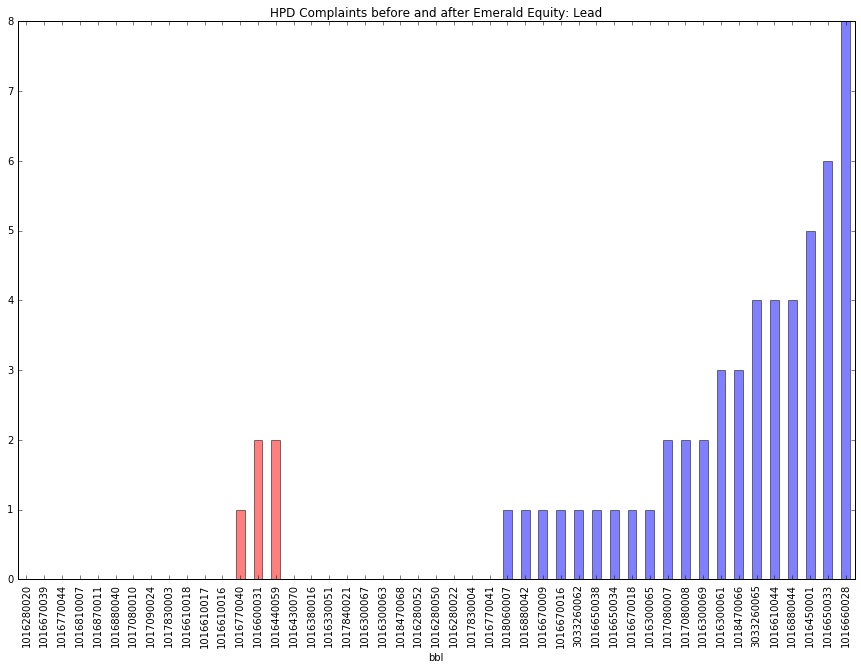

In [31]:
df_hpdnonrecent['Lead'].sort_values(ascending=True).plot(kind='bar', stacked=True, figsize=(15, 10), color = 'red', alpha=.5)
df_hpdrecent['Lead'].sort_values(ascending=True).plot(kind='bar', stacked=True, figsize=(15, 10), color = 'blue', alpha =.5)
plt.title("HPD Complaints before and after Emerald Equity: Lead")
plt.savefig('hpd-lead-complaints.png')

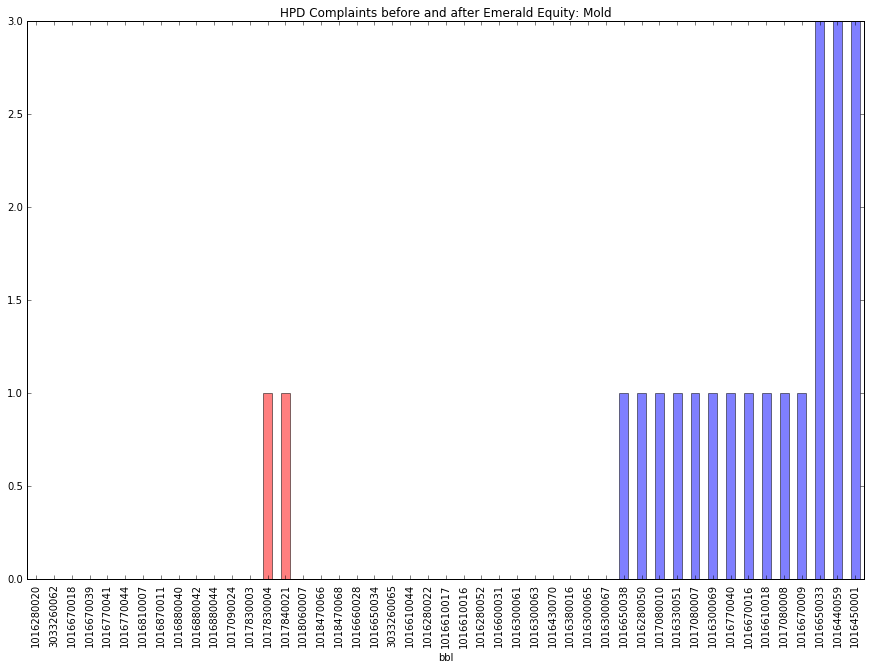

In [32]:
df_hpdnonrecent['Mold'].sort_values(ascending=True).plot(kind='bar', stacked=True, figsize=(15, 10), color = 'red', alpha=.5)
df_hpdrecent['Mold'].sort_values(ascending=True).plot(kind='bar', stacked=True, figsize=(15, 10), color = 'blue', alpha =.5)
plt.title("HPD Complaints before and after Emerald Equity: Mold")
plt.savefig('hpd-mold-complaints.png')

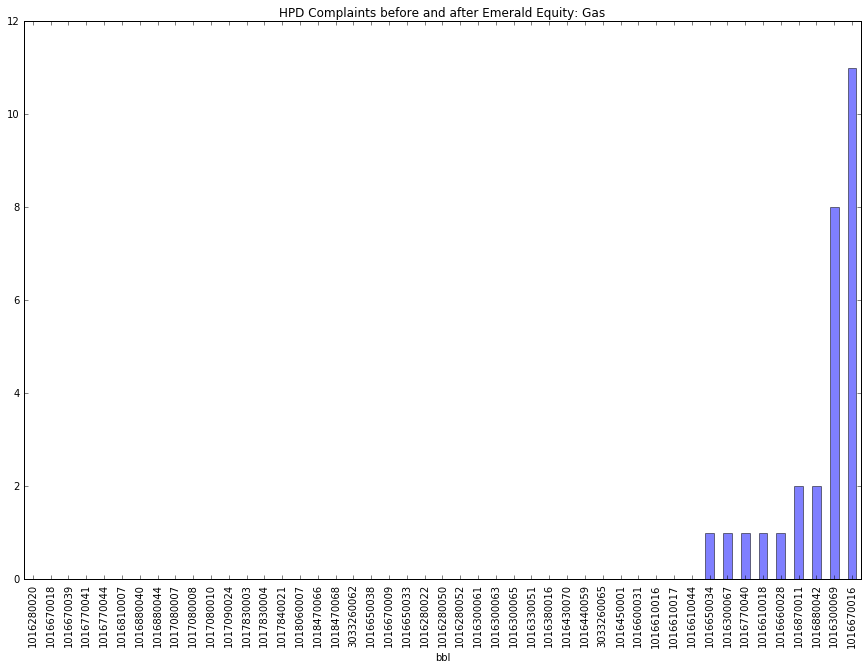

In [17]:
df_hpdnonrecent['Gas'].sort_values(ascending=True).plot(kind='bar', stacked=True, figsize=(15, 10), color = 'red', alpha=.5)
df_hpdrecent['Gas'].sort_values(ascending=True).plot(kind='bar', stacked=True, figsize=(15, 10), color = 'blue', alpha =.5)
plt.title("HPD Complaints before and after Emerald Equity: Gas")
plt.savefig('hpd-gas-complaints.png')

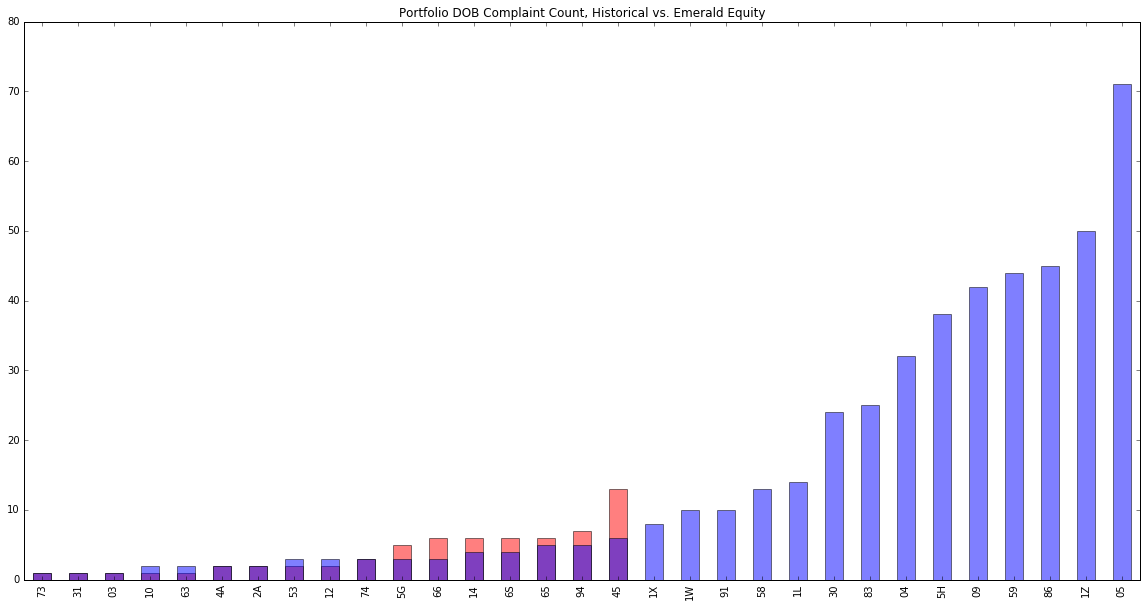

In [11]:
#This data is from 2016-8-30 to 2017-01-01

df_historical['complaintcategory'].value_counts(ascending=True).plot(kind='bar', figsize=(20,10), alpha=.5, color='red')

#This data is from 2017-01-01 to 2018-03-11
df2['complaintcategory'].value_counts(ascending=True).plot(kind='bar', figsize=(20,10), alpha=.5)
plt.title("Portfolio DOB Complaint Count, Historical vs. Emerald Equity")
